In [2]:
from sympy.interactive.printing import init_printing
from sympy import *
import numpy as np 
init_printing(use_unicode=True)

# Fourier Series
## Introduction 
For a periodic function $f$ of period $P$, the Fourier series expansion enables to write the function with the following form:
$$
f(t) = \frac{a_{0}}{2} + \sum^{\infty}_{n=1} a_{n} \cos (2n\pi \frac{t}{P}) + \sum^{\infty}_{n=1} b_{n} \sin (2n\pi \frac{t}{P})
$$

where the constant coefficients $a_n$ and $b_n$ are defined according to: 
$$
a_n = \frac{2}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t) \cos(2n\pi\frac{t}{P})dt
$$
, 
$$
b_n = \frac{2}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t) \sin(2n\pi\frac{t}{P})dt
$$
and the first term of expansion is defined by $a_{0}$ is twice the average of $f(t)$ over the domain $P$:
$$
\frac{a_{0}}{2} = \frac{1}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t)dt
$$

We can notice that:
* if $f$ is an even function, which means $f(-t) = f(t)$, then $\forall n \in   \rm I\!N^{+}, b_{n} = 0 $
* if $f$ is an odd function, which means $f(-t) = -f(t)$, then $\forall n \in   \rm I\!N^{+}, a_{n} = 0 $

## Exercises
### 1. Fourier Series expansion of basic functions 
For both functions of $f(t)=t$ and $f(t) = \vert \cos(\pi\frac{t}{P})\vert$ 
* Q.1 - Define the function, with the assumption that is only defined on $P$.
* Q.2 - Plot the function over $[\frac{-P}{2}, \frac{P}{2}]$ with $P = 1$
* Q.3 - compute manually $a_n$ and $b_n$ and check if the function is even or odd 
* Q.4 - Give the first seven elements of $a_n$ or $b_n$ depending if the function is odd or even 

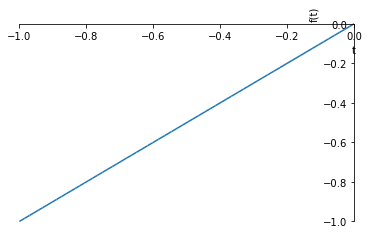

In [2]:
f, t, P = symbols('f, t, P', positive=True)
def f(t):
    return t

plot(f(t), (t, -1/2, 1/2) )

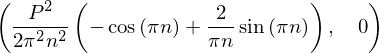

In [3]:
n = symbols('n', positive=True)
a_n, b_n = symbols('a_n, b_n')
a_n = (2/P)*integrate(f(t)* cos(2*n*pi*t/P), t, (t, -P/2, P/2))
b_n = (2/P)*integrate(f(t)* sin(2*n*pi*t/P), t, (t, -P/2, P/2))
a_n.trigsimp(), b_n.trigsimp()# notice b_n is zero and the function is even 

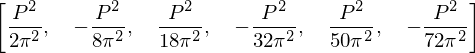

In [4]:
[a_n.subs({n:i}) for i in range (1, 7)]

In [5]:

def f(t, P):
    return abs(cos(pi*t/P)) 

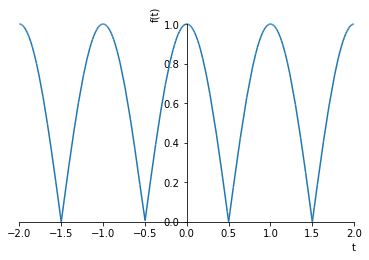

In [6]:
plot(f(t,1), (t, -2, 2))

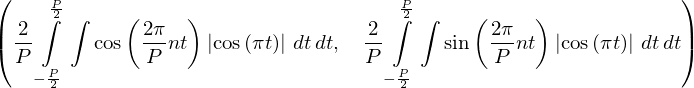

In [7]:
a_n = (2/P)*integrate(f(t,1)* cos(2*n*pi*t/P), t, (t, -P/2, P/2))
b_n = (2/P)*integrate(f(t,1)* sin(2*n*pi*t/P), t, (t, -P/2, P/2))
a_n.trigsimp(), b_n.trigsimp()

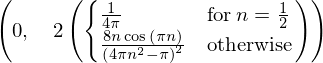

In [8]:
a_n = (2/P)*integrate(cos(pi*t/P)* cos(2*n*pi*t/P), t, (t, -P/2, P/2))
b_n = (2/P)*integrate(cos(pi*t/P)* sin(2*n*pi*t/P), t, (t, -P/2, P/2))
a_n.subs({P:1}).trigsimp(), b_n.subs({P:1}).trigsimp() 

## Fourier Series functions of sympy

In [4]:
#s= fourier_series(f(t,1), (t, -pi, pi))
s=fourier_series(f(t,1),(t,-pi,pi))

NameError: name 'f' is not defined

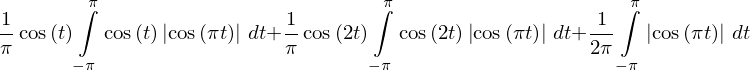

In [37]:
s.truncate(3)

In [39]:
from sympy.series import fourier

In [41]:
s2 = fourier.fourier_series(f(t,1), (-pi, pi))


In [43]:
s2.an

⎡       π                                 π                                   
⎢       ⌠                                 ⌠                                   
⎢cos(t)⋅⎮  cos(t)⋅│cos(π⋅t)│ dt  cos(2⋅t)⋅⎮  cos(2⋅t)⋅│cos(π⋅t)│ dt  cos(3⋅t)⋅
⎢       ⌡                                 ⌡                                   
⎢       -π                                -π                                  
⎢──────────────────────────────, ──────────────────────────────────, ─────────
⎣              π                                 π                            

π                                   π                           ⎤
⌠                                   ⌠                           ⎥
⎮  cos(3⋅t)⋅│cos(π⋅t)│ dt  cos(4⋅t)⋅⎮  cos(4⋅t)⋅│cos(π⋅t)│ dt   ⎥
⌡                                   ⌡                           ⎥
-π                                  -π                          ⎥
─────────────────────────, ──────────────────────────────────, …⎥
       π                                   π      

In [47]:
if s2.is_even:
    print ('yes')
else:
    print ('No')

No


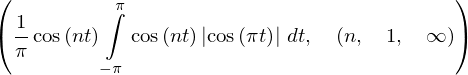

In [52]:
s2.an.args

In [53]:
fourier.FourierSeries??